# Logistic Regression In-Class Exercises

Do these exercises along with the videos.

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Question 1.  Linear Classifier

Given the data below, use the `plt.scatter()` function to plot the data points with different colors for the classes.

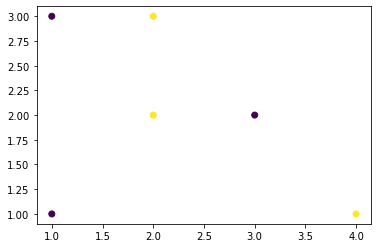

In [265]:
X = np.array([[1,1], [1,3], [2,2], [2,3], [3,2], [4,1]])
y = np.array([0,0,1,1,0,1], dtype=np.int)

# TODO
plt.scatter(X[:,0], X[:,1], c=y)

You should see that the data is not linearly separable.
Find a linear classifier that makes a minimal number of errors on the training data.

Write a function `predict()` function for the classifer and get the predicted labels with the command:

    yhat = predict(X)

Print `yhat` and `y`.  How many errors does your classifier make?

In [266]:
def predict(X):
    # TODO
    yhat = X[:,0] 
    return yhat

# TODO
#   yhat = predict(X)
#   ...

# Question 2:   Logistic Model

Consider the model for the passing a test:

    P(pass test) = 1/(1+exp(-z)),  z =  w0 + w1*hrs_alone + w2*hrs_tutor
    
where `hrs_alone` is the number of hours studied alone and `hrs_tutor` is the number of hours with a tutor.
Given the values below find `w0` for the probability = 0.6.


In [267]:
hrs_alone = 4
hrs_tutor = 1
w1 = 0.2
w2 = 0.5
prob = 0.6

# TODO
z = np.log(prob/(1-prob))
w0 = z - w1 * hrs_alone - w2 * hrs_tutor
print(w0)

-0.8945348918918359


Given the values above, plot the probability of passing as a function of `hrs_tutor` in the range of 0 to 10 hours.

Text(0, 0.5, 'Prob of passing')

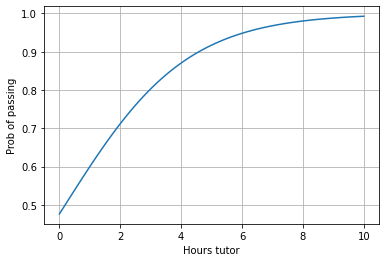

In [268]:
# TODO
hrs_tutor = np.linspace(0,10,100)
z = w0 + w1*hrs_alone + w2* hrs_tutor
prob = 1/(1+np.exp(-z))
plt.plot(hrs_tutor, prob)
plt.grid()
plt.xlabel("Hours tutor")
plt.ylabel("Prob of passing")

## Question 3.  Calculating and Plotting the Binary Cross Entropy Loss

You are given the scalar data `x` and `y` with binary class labels below.

In [269]:
x = np.array([-1,1,3,4,5])
y = np.array([0,0,1,0,1])

Consider a linear classifier of the form:

    z = w[0] + w[1]*x
    yhat = 1 if z > 0 and 0 if z < 0
    
Find `w` that makes at most one error on the training data. Call this selection `w_manual` since you have manually chosen it.

In [270]:
# TODO
#   w_manual = ...

Now consider a logistic model,

    z = w[0] + w[1]*x
    p(y=1|x) = 1 / (1 + exp(-z))
    
Complete the function below that computes the binary cross entropy for a given vector `w` and training data `x,y`. Use the function to compute the BCE loss for the `w_manual`. 

In [271]:
def bce_loss(x,y,w):
    # TODO
    # J = BCE loss
    return J

# Print the loss for `w_manual`

Now consider a set of `w = [w0, 0.5]`.  
* Plot the BCE loss over 100 values `w0` from -2.5 to 0  
* What value of `w0`gives the minimum BCE loss?   Call this `w0_opt`.
* What is the minimum BCE loss?

In [272]:
nt = 100
w0_test = np.linspace(-2.5,0,nt)
w1 = 0.5

# TODO
#   loss = ...
#   w0_opt = ...

Suppose you select `w1=0.5`and `w0=w0_opt` from the previous section.  What values `x` is `P(y=1|x) > 0.5`?

In [273]:
# TODO.  Describe the set

# We have P(y=1|x) > 0.5 <=> z > 0  <=> w0 + w1*x > 0 <=> x > t = -w0/w1

## Question 4.  Heart Attack Fit

In this exercise, we fit heart attack data from the UCI website.  We can load it as follows.

In [274]:
## Generate synthetic data
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, na_values='?',header=None, names=names)
df = df.dropna()

Print the first few rows of the data frame.
Print the number of attributes of number of samples

In [275]:
# TODO
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


The target will be `num` which is the number of arterial blockages.  Get the target vector `y` from the `df[num]` column.  To make this a binary classification problem, let `y[i] == 1` whenever the number is greater than 0.  Otherwise, `y[i] == 0`.  You will have to convert the value to integer.

In [276]:
# TODO
y = df['num']
y = np.array(y)
y = (y > 0).astype(int)
print(y[:6])

[0 1 1 0 0 0]


Get the data matrix `X` from all the attributes other than `num`.  

In [277]:
# TODO
X = df[names[:len(names)-1]] 
X.head(6)
X = np.array(X)

Split the data into traing and test with `test_size=0.25`.

In [278]:
from sklearn.model_selection import train_test_split

# TODO:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.25)

Scale the training and test data with the `StandardScaler`. 

In [279]:
from sklearn.preprocessing import StandardScaler

# TODO
scal = StandardScaler()

Xtr1 = scal.fit_transform(Xtr)
Xts1 = scal.transform(Xts)

Fit the data on the training data set, predict on the test and measure the accuracy.

In [280]:
# TODO
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(C=1e5)
reg.fit(Xtr1, ytr)
yhat = reg.predict(Xts1)
print("Accuracy is {}".format(np.mean(yhat==yts)))

Accuracy is 0.8533333333333334


In [281]:
print(reg.coef_)

[[-0.13153022  0.74007079  0.41088698  0.48197663  0.3204383  -0.37949646
   0.08020917 -0.54299503  0.37613005 -0.06498018  0.70630574  1.30061778
   0.65738062]]


Create a stem plot of the coefficients.  

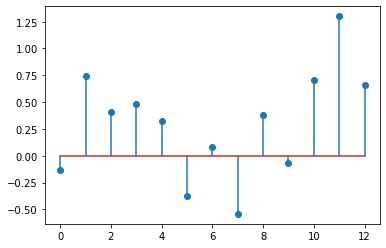

In [282]:
# TODO
plt.stem(reg.coef_[0])
plt.show()


## Further exercises

If you want to try a little more, see if you can use L1 regularization to find the features that are best in explaining heart blockages.